In [50]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm

In [51]:
#Reading the data from a csv file
Mall_Customers_data=pd.read_csv("Mall_Customers.csv")

# EDA

In [52]:
#printing first five rows
Mall_Customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
#Checking number of rows and columns in dataset
Mall_Customers_data.shape

(200, 5)

In [54]:
#Checking datatypes of features
Mall_Customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [55]:
#It is better to drop "CustomerID" as it is unique value for everyone and it will not play any role on customer expenses
Mall_Customers_data.drop("CustomerID",axis=1,inplace=True)

In [56]:
Mall_Customers_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [57]:
Mall_Customers_data["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

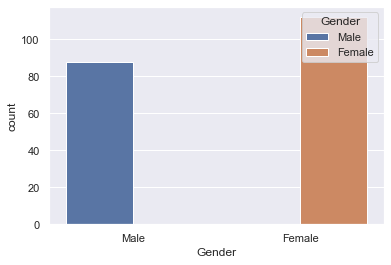

In [58]:
sns.countplot(Mall_Customers_data["Gender"],hue=Mall_Customers_data["Gender"])
plt.show()

In [59]:
Mall_Customers_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [60]:
Mall_Customers_data.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

From the above cell result we can conclude that there are no null values and we can proced further without
doing any Missing value Operations 

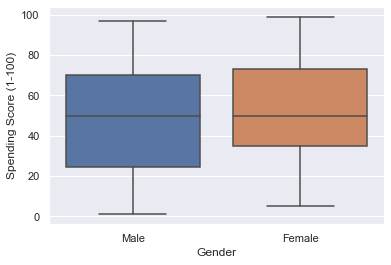

In [61]:
sns.boxplot(data=Mall_Customers_data,x="Gender",y="Spending Score (1-100)")

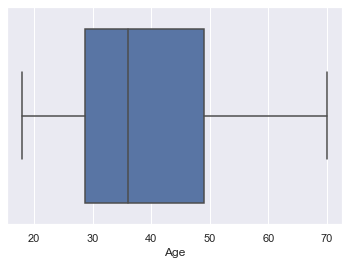

In [62]:
sns.boxplot(Mall_Customers_data["Age"])

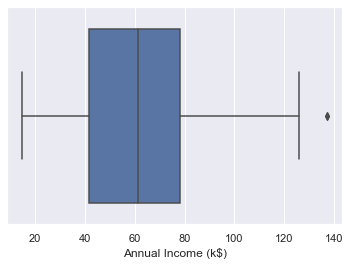

In [63]:
sns.boxplot(Mall_Customers_data["Annual Income (k$)"])

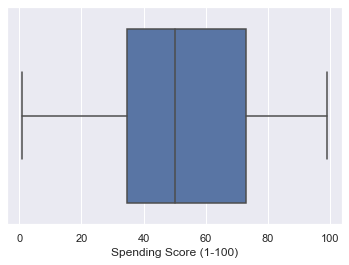

In [64]:
sns.boxplot(Mall_Customers_data["Spending Score (1-100)"])

In [65]:
px.histogram(Mall_Customers_data,x="Age",color="Gender")

In [66]:
px.histogram(Mall_Customers_data,x='Age',y='Spending Score (1-100)',color='Gender')

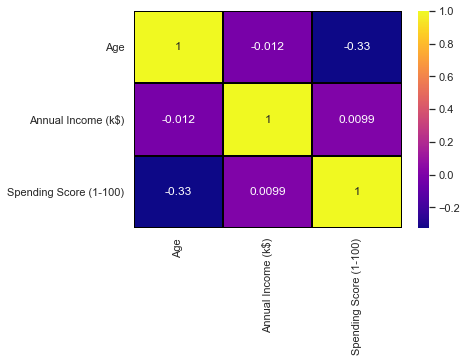

In [67]:
#Another best way to analyse the correlation between attributes is heatmap
sns.heatmap(Mall_Customers_data.corr(),annot=True,cmap="plasma",linecolor="black",linewidths=1)
plt.show()

In [68]:
X=Mall_Customers_data.iloc[:,[1,2,3]].values

In [69]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [70]:
WCSS=[]
for i in range(1,11):
    #kmeans=KMeans(n_clusters=i,init="k-means++",random_state=2)
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

C:\Users\1TIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [71]:
WCSS

[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75493.84464013916,
 58300.443321590676,
 51084.50595493435,
 44342.31739341741,
 40646.170978041555,
 37248.45914067415]

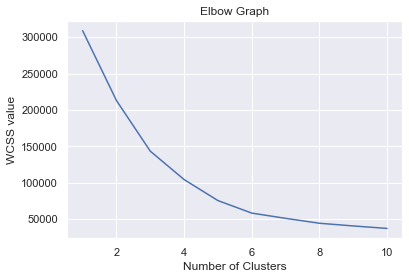

In [72]:
sns.set()
plt.plot(range(1,11),WCSS)
plt.title("Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS value")
plt.show()

In [73]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.293166070535953
For n_clusters = 3 The average silhouette_score is : 0.3839349967742105
For n_clusters = 4 The average silhouette_score is : 0.40546302077733304
For n_clusters = 5 The average silhouette_score is : 0.44428597560893024
For n_clusters = 6 The average silhouette_score is : 0.4523443947724053


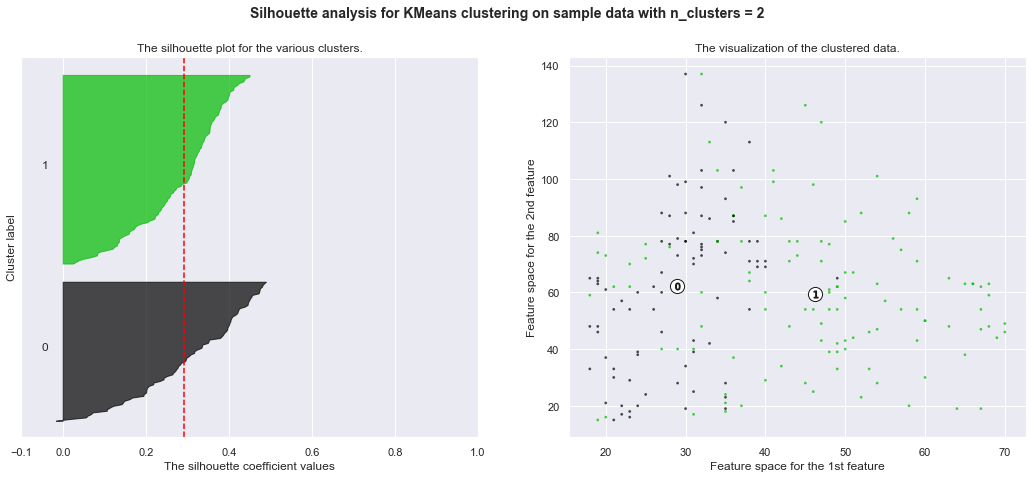

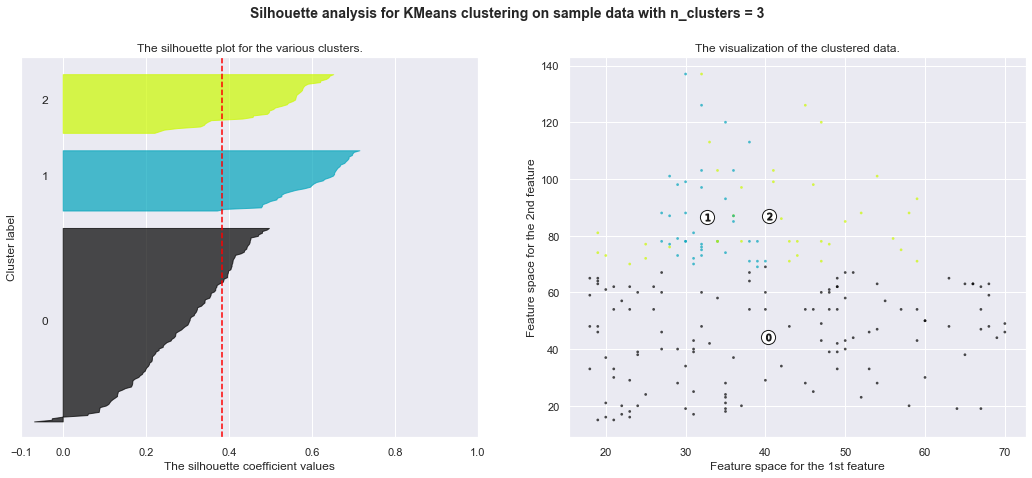

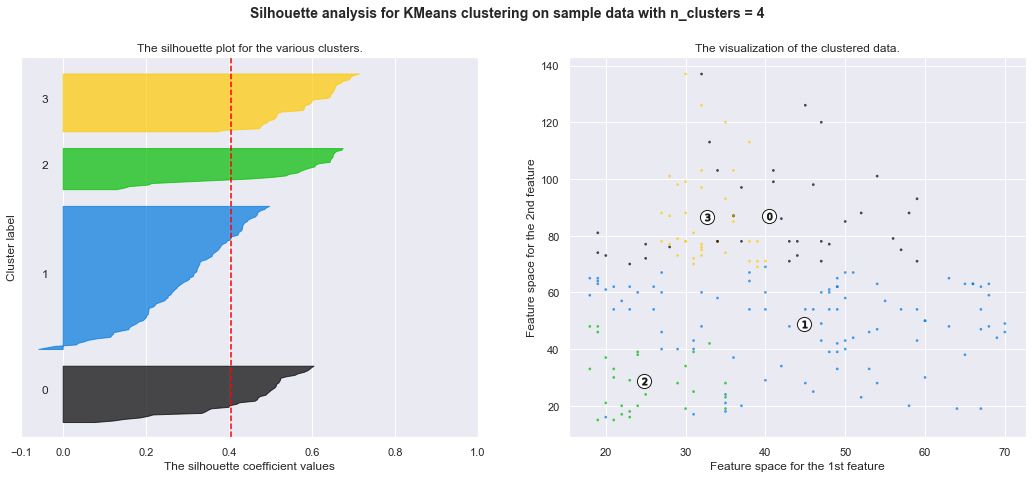

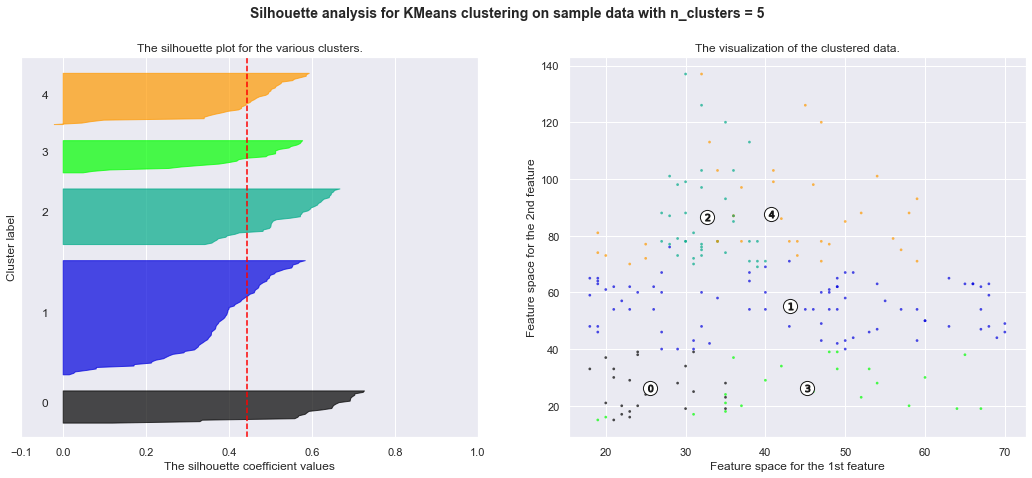

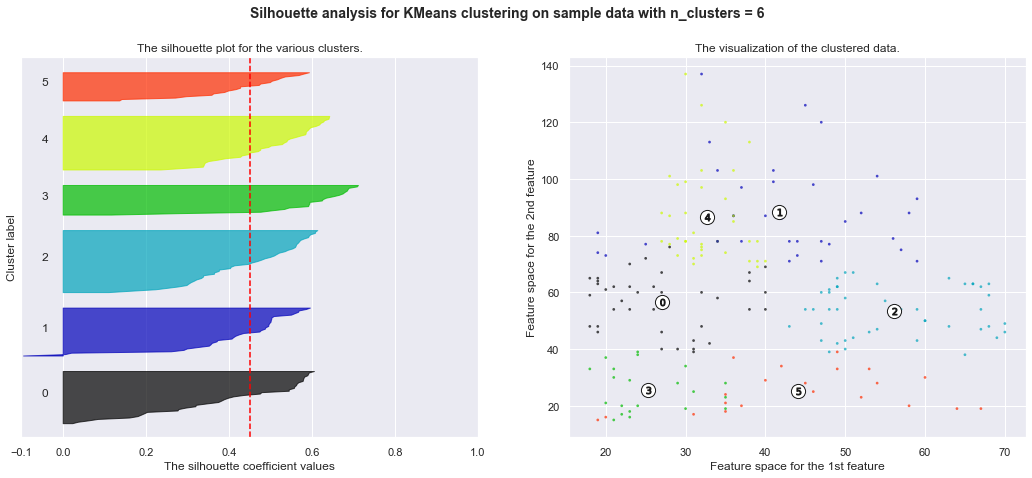

In [75]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## From the above Silhoutte Coefficient values and Silhotte score 5 clusters are best 

In [76]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=30)
Out=kmeans.fit_predict(X)
print(Out)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


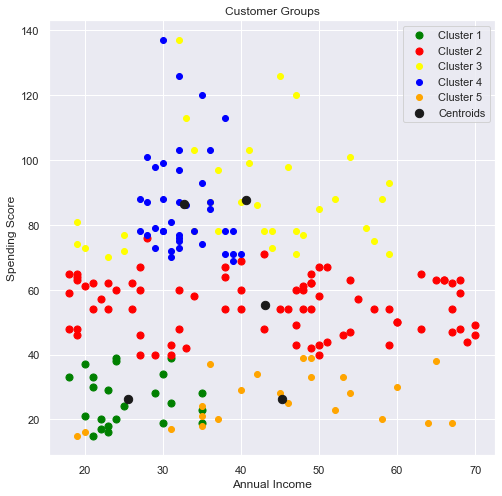

In [77]:
plt.figure(figsize=(8,8))
plt.scatter(X[Out==0,0],X[Out==0,1],s=50,c="green",label='Cluster 1')
plt.scatter(X[Out==1,0],X[Out==1,1],s=50,color="red",label='Cluster 2')
plt.scatter(X[Out==2,0],X[Out==2,1],color="yellow",label='Cluster 3')
plt.scatter(X[Out==3,0],X[Out==3,1],color="blue",label='Cluster 4')
plt.scatter(X[Out==4,0],X[Out==4,1],color="orange",label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=70,c='k',label = 'Centroids')
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [78]:
clusters = kmeans.labels_
clusters

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [79]:
X = Mall_Customers_data.iloc[:,1:]
X = X.assign(cluster = clusters)
X

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4
...,...,...,...,...
195,35,120,79,3
196,45,126,28,2
197,32,126,74,3
198,32,137,18,2


In [80]:
fig = px.scatter(X, x='Age', y='Annual Income (k$)', color='cluster', opacity=0.9)
fig.update_layout(margin=dict(l=1, r=1, b=1, t=1))

In [81]:
import plotly.express as px
px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='cluster', opacity=0.9)

# Given data is perfectly divided into clusters in the best way to anyalise 